In [27]:
### Import statements
### import time library
import time
### import pyplot as library
from matplotlib import pyplot as plt
### import numpy library
import numpy as np


In [28]:
### Function to compute total kinetic energy given an array of masses and velocities
def Kinetic(mass_array, velocity_array):
    N = len(mass_array)
    Kin = 0.
    for i in range(0,N):
        Kin = Kin + 0.5*mass_array[i]*velocity_array[i]**2
    return Kin

In [29]:
### function to compute potential energy given an array of separations and an array of charges
def Potential(sep_array, charge_array):
    ### presumably the number of particles is equal to the length
    ### of the array of charges
    N = len(charge_array)
    
    ### initialize the potential energy to zer
    Pot = 0.
    ### nested loop
    for i in range(0,N):
        for j in range(0,N):
            ### do not calculate potential of particle with itself!
            if (i!=j):
                Pot = Pot + charge_array[i]*charge_array[j]/sep_array[i][j]
    return Pot
            

# Questions!
- How does the total kinetic energy of a collection of $N$ particles grow with $N$ assuming each particle has the same average kinetic energy?  Compute the total kinetic energy for five different values of $N$ and plot the results using $pyplot$ (a sample program using $pyplot$ can be found below)
#### Answer 1:  The total kinetic energy scales linearly with the number of particles, as can be seen from the blue curve plotted in the figure titled 'Energy vs Number of Particles'.  This is because the total kinetic energy is just the sum over the kinetic energy of each individual particle.
- How does the total potential energy of a collection of $N$ equally spaced charged particles grow with $N$?  Compute the the total potential energy for five different values of $N$ and plot the results.
#### Answer 2:  The total kinetic energy scales linearly with the number of particles, as can be seen from the blue curve plotted in the figure titled 'Energy vs Number of Particles'.  This is because the total potential energy depends upon the potential energy of particle pairs, and the number of particle pairs increases approximately as the square of the number of particles.
- Use the $time$ library in python to determine how the time required to compute the kinetic and potential energy for the five different values of $N$; plot the time required vs $N$ and discuss if the kinetic seems to scale linearly and the potential seems to scale quadratically with $N$.
#### Answer 3:  The time require to compute the total kinetic energy does indeed appear to scale linearly with the number of particles, and the time required to compute the total potential energy seems to scale quadratically.  We use a single for-loop in our function to compute the total kinetic, and two nested for-loops in our code to compute the potential; the former has linear scaling and the latter has quadratic.

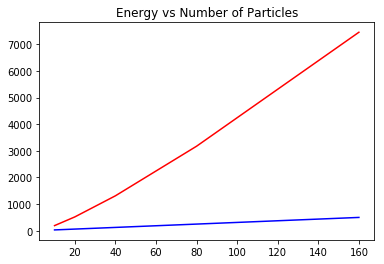

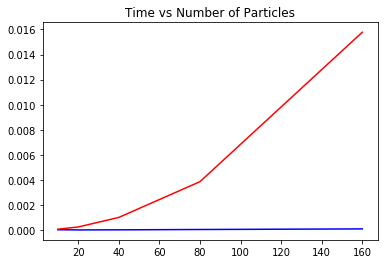

In [30]:
### Create an array with 5 different values of Npart
### I'll choose to double number of particle numbers in each entry
N_array = [10, 20, 40, 80, 160]

### Create an array with 5 different entries that will store the total kinetic 
### energy for each number of Npart
Kin_array = np.zeros(len(N_array))

### Create an array with 5 different entries that will store the total potential
### energy for each number of Npart
Pot_array = np.zeros(len(N_array))

### create an array of the same length at N_array that will store
### the time taken to compute total kinetic energy for each number of particles
kin_time_array = np.zeros(len(N_array))

### create an array of the same length at N_array that will store
### the time taken to compute total potential energy for each number of particles
pot_time_array = np.zeros(len(N_array))

### Loop through elements of N_array... assign the appropriate 
### arrays of particle masses, velocities, positions, charges, and separations
### in each case and then compute kinetic and potential energy, taking time in each case.

for i in range(0,len(N_array)):
    ### define all arrays for this number of particles
    m = np.ones(N_array[i])*1.0
    v = np.ones(N_array[i])*2.5
    q = np.ones(N_array[i])
    x = np.linspace(0,(N_array[i]-1)*0.2,N_array[i])
    
    ### need to compute separation values for r array
    r = np.zeros((N_array[i],N_array[i]))
    for j in range(0,len(m)):
        for k in range(0,len(m)):
            r[j][k] = np.sqrt( (x[j] - x[k])**2)
    
    ### now that m, v, q, and r are defined for  compute total kinetic energy,
    ### store the result to Kin_array, time how long it takes to compute 
    ### the kinetic energy, and store the time in time_array
    
    ### kinetic energy first
    start_time = time.time()
    Kin_array[i] = Kinetic(m, v)
    end_time = time.time()
    kin_time_array[i] = end_time - start_time
    
    ### potential energy second
    start_time = time.time()
    Pot_array[i] = Potential(r, q)
    end_time = time.time()
    pot_time_array[i] = end_time - start_time
    

plt.plot(N_array, Kin_array, 'blue')
plt.plot(N_array, Pot_array, 'red')
plt.title("Energy vs Number of Particles")
plt.show()


plt.plot(N_array, kin_time_array, 'blue')
plt.plot(N_array, pot_time_array, 'red')
plt.title("Time vs Number of Particles")
plt.show()
